Prodigy InfoTech ML Internship - Task 2 

In this project we have a supermarket or mall membership cards, which include some basic data about customers.

Goal : Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Fares Yassen

# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

# Exploring the data 

In [2]:
raw_data = pd.read_csv("Mall_Customers.csv")
raw_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Note : Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

In [4]:
raw_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Copying & Cleaning

In [5]:
data = raw_data.copy()

In [6]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [7]:
data = data.drop(['CustomerID'], axis=1)

In [8]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


# Clustering based on Annual Income & Spending Score

## Selecting the Features

In [9]:
x1 = data.iloc[:,2:]
x1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## The Elbow Method 
Choosing the optimal number of clusters

In [10]:
wcss1 = [] # Stands for Within-Cluster Sum of Square

for i in range(1,11):
    kmeans = KMeans(i, n_init='auto')
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)

wcss1

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38858.959975143895,
 31969.42655023547,
 25044.96776401891,
 22143.222100767438,
 20887.596528992828]

Text(0, 0.5, 'WCSS')

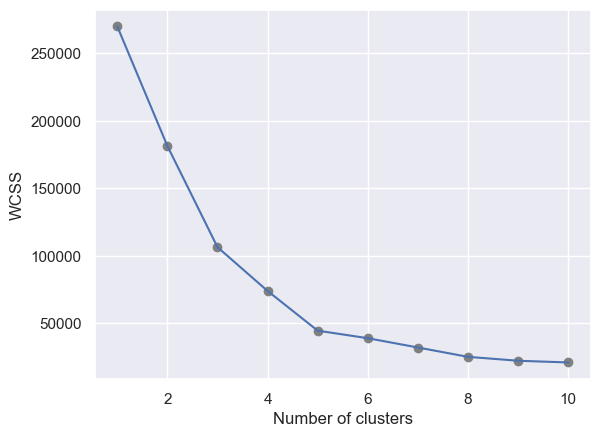

In [11]:
plt.plot(range(1,11), wcss1)
plt.scatter(range(1, 11), wcss1, color='grey')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Building the Model

In [12]:
kmeans1 = KMeans(5, n_init='auto')

kmeans1.fit(x1)

clusters1 = x1.copy()

clusters1['clusters_pred'] = kmeans1.fit_predict(x1)

clusters1

,Annual Income (k$),Spending Score (1-100),clusters_pred
0,15,39,2
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


Text(0.5, 1.0, 'Clusters based on Annual Income & Spending Score')

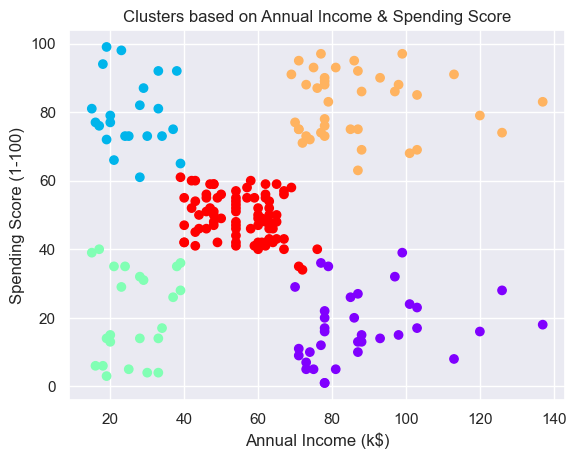

In [13]:
plt.scatter(clusters1['Annual Income (k$)'], clusters1['Spending Score (1-100)'], c=clusters1['clusters_pred'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Annual Income & Spending Score')

Same steps applied below, but for different set of features 

# Clustering based on Age and Spending Score

In [14]:
x2 = data[['Age', 'Spending Score (1-100)']]
x2

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [15]:
wcss2 = []

for i in range(1,11):
    kmeans = KMeans(i, n_init='auto')
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)

wcss2

[171535.50000000003,
 75949.15601023012,
 45844.53681626927,
 28165.583566629342,
 23849.58174885412,
 19586.02448494345,
 17696.770772116026,
 13054.172145982677,
 11481.771382562689,
 10173.03947811448]

Text(0, 0.5, 'WCSS')

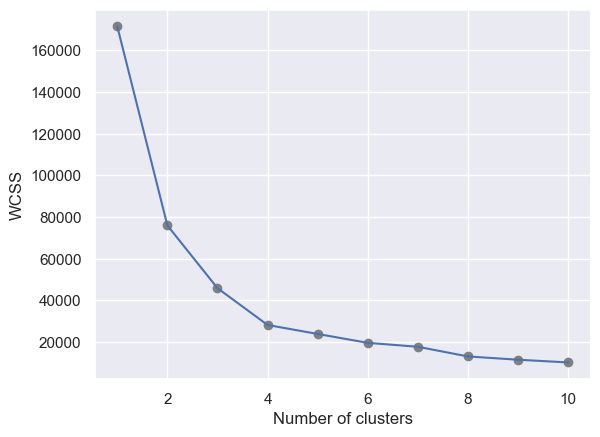

In [16]:
plt.plot(range(1,11), wcss2)
plt.scatter(range(1, 11), wcss2, color='grey')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [17]:
kmeans2 = KMeans(4, n_init='auto')

kmeans2.fit(x2)

clusters2 = x2.copy()

clusters2['clusters_pred'] = kmeans2.fit_predict(x2)

clusters2

,Age,Spending Score (1-100),clusters_pred
0,19,39,1
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,1
...,...,...,...
195,35,79,3
196,45,28,2
197,32,74,3
198,32,18,2


Text(0.5, 1.0, 'Clusters based on Age & Spending Score')

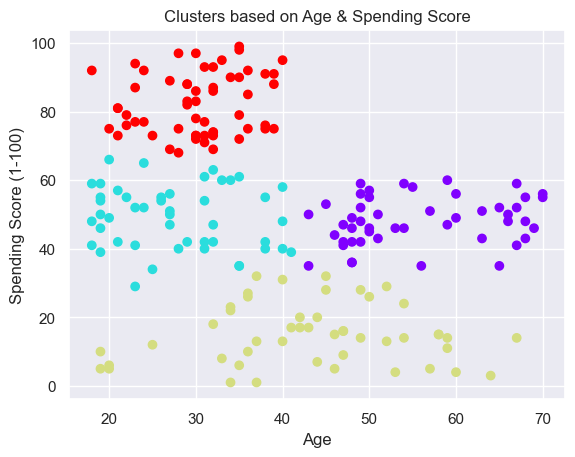

In [18]:
plt.scatter(clusters2['Age'], clusters2['Spending Score (1-100)'], c=clusters2['clusters_pred'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Age & Spending Score')

# Clustering based on Age, Annual Income and Spending Score

In [19]:
x3 = data.iloc[:,1:]
x3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
wcss3 = []

for i in range(1,11):
    kmeans = KMeans(i, n_init='auto')
    kmeans.fit(x3)
    wcss3.append(kmeans.inertia_)

wcss3

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 109997.0887226427,
 75350.77917248776,
 58300.443321590676,
 51131.068398268435,
 49576.81167929291,
 40921.11611648042,
 38652.95360815833]

Text(0, 0.5, 'WCSS')

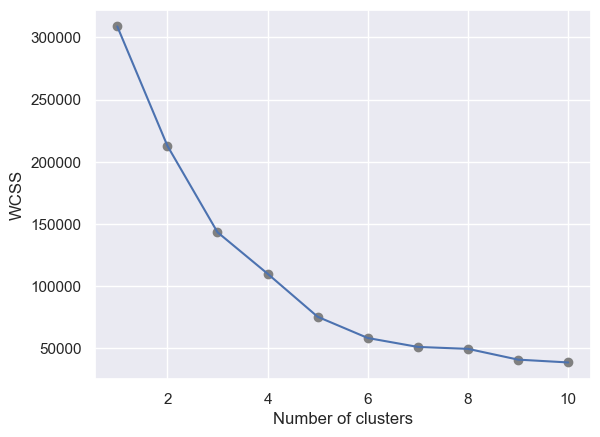

In [21]:
plt.plot(range(1,11), wcss3)
plt.scatter(range(1, 11), wcss3, color='grey')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [22]:
kmeans3 = KMeans(5, n_init='auto')

kmeans3.fit(x3)

clusters3 = x3.copy()

clusters3['clusters_pred'] = kmeans3.fit_predict(x3)

clusters3

,Age,Annual Income (k$),Spending Score (1-100),clusters_pred
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


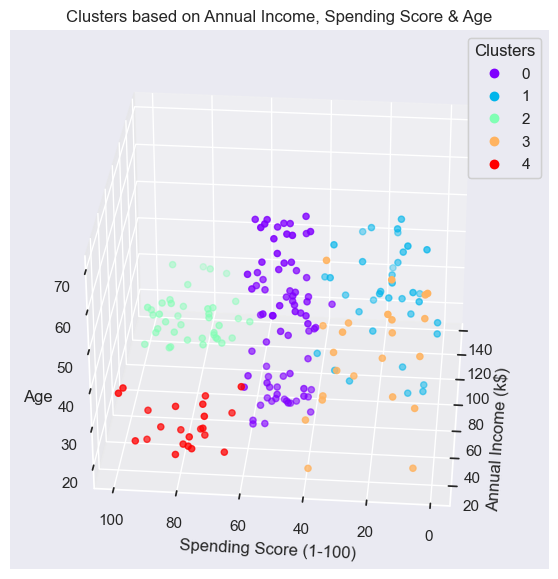

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming clusters1 is your DataFrame with three features and a predicted cluster label
# For example: 'Annual Income (k$)', 'Spending Score (1-100)', and 'Age'

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(clusters3['Annual Income (k$)'], 
                     clusters3['Spending Score (1-100)'], 
                     clusters3['Age'], 
                     c=clusters3['clusters_pred'], 
                     cmap='rainbow')

# Adding labels
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('Clusters based on Annual Income, Spending Score & Age')

# Adding a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.view_init(30, 185)

# Display the plot
plt.show()


# Appendix
I created a heatmap to visualize the data 

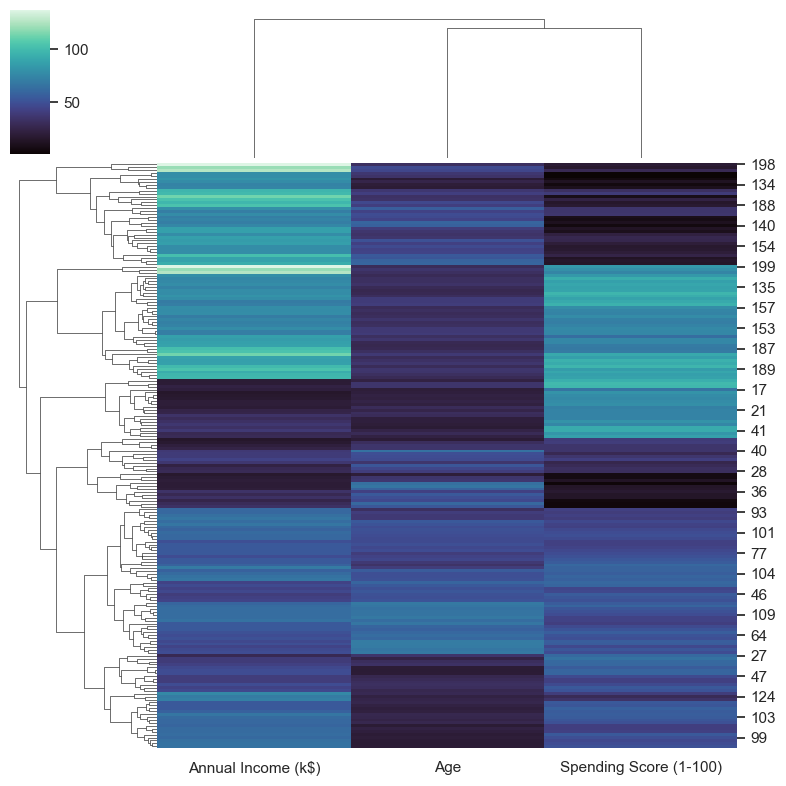

In [28]:
sns.clustermap(x3,cmap='mako', figsize=(8, 8))